In [3]:
#import the required libraries
import h2o
import sys
import pandas as pd
from h2o.estimators.gbm import H2OGradientBoostingEstimator


In [5]:
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.241-b07, mixed mode)
  Starting server from C:\Users\admin\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\admin\AppData\Local\Temp\tmp_y3kjjme
  JVM stdout: C:\Users\admin\AppData\Local\Temp\tmp_y3kjjme\h2o_admin_started_from_python.out
  JVM stderr: C:\Users\admin\AppData\Local\Temp\tmp_y3kjjme\h2o_admin_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.3
H2O cluster version age:,"14 days, 22 hours and 13 minutes"
H2O cluster name:,H2O_from_python_admin_0mk1ns
H2O cluster total nodes:,1
H2O cluster free memory:,1.752 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [8]:
local_url = "https://raw.githubusercontent.com/h2oai/sparkling-water/master/examples/smalldata/prostate/prostate.csv"
df=h2o.import_file(local_url)
df.head()

Parse progress: |█████████████████████████████████████████████████████████| 100%


ID,CAPSULE,AGE,RACE,DPROS,DCAPS,PSA,VOL,GLEASON
1,0,65,1,2,1,1.4,0,6
2,0,72,1,3,2,6.7,0,7
3,0,70,1,1,2,4.9,0,6
4,0,76,2,2,1,51.2,20,7
5,0,69,1,1,1,12.3,55.9,6
6,1,71,1,3,2,3.3,0,8
7,0,68,2,4,2,31.9,0,7
8,0,61,2,4,2,66.7,27.2,7
9,0,69,1,1,1,3.9,24,7
10,0,68,2,1,2,13,0,6


In [57]:
#define features and response column
y='CAPSULE'
feature_names=df.col_names
feature_names.remove(y)
feature_names

['ID', 'AGE', 'RACE', 'DPROS', 'DCAPS', 'PSA', 'VOL', 'GLEASON']

In [58]:
df[y]=df[y].asfactor()
df_train, df_test=df.split_frame(ratios=[0.67])
print(df_train.shape)
print(df_test.shape)

(252, 9)
(128, 9)


In [59]:
prostate_gbm=H2OGradientBoostingEstimator(model_id='prostate_gbm', ntrees=500, learn_rate=0.001, max_depth=10, score_each_iteration=True)

In [60]:
#building h2o GBM model:
prostate_gbm.train(x=feature_names, y=y, training_frame=df_train, validation_frame=df_test)

prostate_gbm

gbm Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  prostate_gbm


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,500.0,500.0,147537.0,6.0,7.0,6.332,16.0,22.0,18.812




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.1631912933861758
RMSE: 0.4039694213503985
LogLoss: 0.5116440544244236
Mean Per-Class Error: 0.13148565903963905
AUC: 0.9357718337093135
AUCPR: 0.9102520729634959
Gini: 0.871543667418627

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37418392845788045: 


,,0,1,Error,Rate
0,0,115.0,30.0,0.2069,(30.0/145.0)
1,1,6.0,101.0,0.0561,(6.0/107.0)
2,Total,121.0,131.0,0.1429,(36.0/252.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.374184,0.848739,87.0
1,max f2,0.362694,0.917108,94.0
2,max f0point5,0.481900,0.851064,53.0
3,max accuracy,0.377885,0.857143,85.0
4,max precision,0.656389,1.000000,0.0
5,max recall,0.290873,1.000000,155.0
6,max specificity,0.656389,1.000000,0.0
7,max absolute_mcc,0.374184,0.729175,87.0
8,max min_per_class_accuracy,0.423046,0.831776,71.0
9,max mean_per_class_accuracy,0.374184,0.868514,87.0



Gains/Lift Table: Avg response rate: 42.46 %, avg score: 42.46 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.019841,0.652282,2.355140,2.355140,1.000000,0.653862,1.000000,0.653862,0.046729,0.046729,135.514019,135.514019
1,,2,0.051587,0.647714,2.355140,2.355140,1.000000,0.647714,1.000000,0.650079,0.074766,0.121495,135.514019,135.514019
2,,3,0.051587,0.647680,0.000000,2.355140,0.000000,0.000000,1.000000,0.650079,0.000000,0.121495,-100.000000,135.514019
3,,4,0.103175,0.634767,2.355140,2.355140,1.000000,0.643660,1.000000,0.646870,0.121495,0.242991,135.514019,135.514019
4,,5,0.150794,0.610669,2.355140,2.355140,1.000000,0.622331,1.000000,0.639121,0.112150,0.355140,135.514019,135.514019
5,,6,0.202381,0.579584,2.173976,2.308961,0.923077,0.592407,0.980392,0.627213,0.112150,0.467290,117.397556,130.896097
6,,7,0.301587,0.512670,1.789907,2.138219,0.760000,0.541705,0.907895,0.599086,0.177570,0.644860,78.990654,113.821938
7,,8,0.408730,0.436854,1.395639,1.943562,0.592593,0.467796,0.825243,0.564670,0.149533,0.794393,39.563863,94.356229
8,,9,0.500000,0.384391,1.228769,1.813084,0.521739,0.420501,0.769841,0.538353,0.112150,0.906542,22.876879,81.308411
9,,10,0.599206,0.347026,0.659439,1.622083,0.280000,0.362842,0.688742,0.509295,0.065421,0.971963,-34.056075,62.208331




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.20735250778767136
RMSE: 0.4553597564428277
LogLoss: 0.6036140601388642
Mean Per-Class Error: 0.292152704135737
AUC: 0.7423117709437964
AUCPR: 0.5833129979185206
Gini: 0.4846235418875928

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3745191819904164: 


,,0,1,Error,Rate
0,0,43.0,39.0,0.4756,(39.0/82.0)
1,1,5.0,41.0,0.1087,(5.0/46.0)
2,Total,48.0,80.0,0.3438,(44.0/128.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.374519,0.650794,58.0
1,max f2,0.343675,0.794224,68.0
2,max f0point5,0.474825,0.578512,32.0
3,max accuracy,0.474825,0.695312,32.0
4,max precision,0.656076,1.000000,0.0
5,max recall,0.292114,1.000000,84.0
6,max specificity,0.656076,1.000000,0.0
7,max absolute_mcc,0.374519,0.411998,58.0
8,max min_per_class_accuracy,0.441800,0.670732,38.0
9,max mean_per_class_accuracy,0.374519,0.707847,58.0



Gains/Lift Table: Avg response rate: 35.94 %, avg score: 44.66 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.015625,0.651049,2.782609,2.782609,1.000000,0.654179,1.000000,0.654179,0.043478,0.043478,178.260870,178.260870
1,,2,0.039062,0.647714,2.782609,2.782609,1.000000,0.647714,1.000000,0.650300,0.065217,0.108696,178.260870,178.260870
2,,3,0.046875,0.646259,2.782609,2.782609,1.000000,0.646499,1.000000,0.649667,0.021739,0.130435,178.260870,178.260870
3,,4,0.101562,0.643491,0.795031,1.712375,0.285714,0.643491,0.615385,0.646341,0.043478,0.173913,-20.496894,71.237458
4,,5,0.101562,0.643462,0.000000,1.712375,0.000000,0.000000,0.615385,0.646341,0.000000,0.173913,-100.000000,71.237458
5,,6,0.156250,0.601098,1.590062,1.669565,0.571429,0.617358,0.600000,0.636197,0.086957,0.260870,59.006211,66.956522
6,,7,0.203125,0.588084,1.391304,1.605351,0.500000,0.594072,0.576923,0.626476,0.065217,0.326087,39.130435,60.535117
7,,8,0.312500,0.559484,1.192547,1.460870,0.428571,0.572194,0.525000,0.607477,0.130435,0.456522,19.254658,46.086957
8,,9,0.406250,0.470291,1.855072,1.551839,0.666667,0.501708,0.557692,0.583069,0.173913,0.630435,85.507246,55.183946
9,,10,0.515625,0.424416,1.192547,1.475626,0.428571,0.439272,0.530303,0.552567,0.130435,0.760870,19.254658,47.562582




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-02-20 18:40:52,0.000 sec,0.0,0.494283,0.681734,0.500000,0.000000,1.00000,0.575397,0.484231,0.661911,0.500000,0.000000,1.000000,0.640625
1,,2020-02-20 18:40:52,0.032 sec,1.0,0.494044,0.681252,0.896938,0.535618,2.35514,0.190476,0.484132,0.661715,0.705196,0.368528,1.590062,0.359375
2,,2020-02-20 18:40:52,0.032 sec,2.0,0.493807,0.680772,0.907863,0.543788,2.35514,0.186508,0.484009,0.661473,0.727200,0.383680,1.590062,0.312500
3,,2020-02-20 18:40:52,0.047 sec,3.0,0.493570,0.680293,0.907477,0.543142,2.35514,0.186508,0.483884,0.661225,0.731177,0.385443,1.590062,0.312500
4,,2020-02-20 18:40:52,0.047 sec,4.0,0.493332,0.679814,0.907541,0.543401,2.35514,0.178571,0.483791,0.661039,0.728526,0.384738,1.590062,0.304688
5,,2020-02-20 18:40:52,0.063 sec,5.0,0.493096,0.679337,0.907541,0.543314,2.35514,0.182540,0.483669,0.660799,0.730912,0.386201,1.590062,0.304688
6,,2020-02-20 18:40:52,0.063 sec,6.0,0.492859,0.678859,0.907283,0.543091,2.35514,0.178571,0.483571,0.660604,0.725875,0.382610,1.590062,0.320312
7,,2020-02-20 18:40:52,0.078 sec,7.0,0.492623,0.678384,0.906897,0.542809,2.35514,0.182540,0.483450,0.660365,0.729321,0.384981,1.590062,0.304688
8,,2020-02-20 18:40:52,0.094 sec,8.0,0.492387,0.677908,0.907090,0.542905,2.35514,0.178571,0.483354,0.660176,0.726935,0.382939,1.590062,0.320312
9,,2020-02-20 18:40:52,0.094 sec,9.0,0.492152,0.677435,0.906703,0.542593,2.35514,0.186508,0.483231,0.659931,0.730382,0.385310,1.590062,0.304688



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,GLEASON,4736.911621,1.000000,0.463119
1,PSA,1879.193115,0.396713,0.183725
2,DPROS,1388.139771,0.293047,0.135716
3,VOL,946.589355,0.199833,0.092546
4,ID,909.118164,0.191922,0.088883
5,AGE,364.865082,0.077026,0.035672
6,DCAPS,3.454360,0.000729,0.000338
7,RACE,0.000000,0.000000,0.000000


In [61]:
train_performance=prostate_gbm.model_performance(df_train)
test_performance=prostate_gbm.model_performance(df_test)

test_performance
print(test_performance.gini())

0.4846235418875928


In [62]:
#genreate the predictions using the test dataset
predictions=prostate_gbm.predict(df_test)
predict_probability=predictions['p1'].as_data_frame()
predictions_list=predict_probability['p1'].tolist()


gbm prediction progress: |████████████████████████████████████████████████| 100%


In [26]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random

In [63]:
#get th real response result from the test dataframe
actual=df_test[y].as_data_frame()
actual_list=actual[y].tolist()


In [64]:
fpr, tpr, thresholds=roc_curve(actual_list, predictions_list)
roc_auc=auc(fpr, tpr)
print(roc_auc)
print(test_performance.auc())

0.7423117709437964
0.7423117709437964


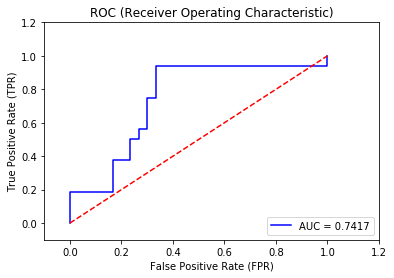

In [34]:

plt.title('ROC (Receiver Operating Characteristic)')

plt.plot(fpr, tpr, 'b',

label='AUC = %0.4f'% roc_auc)

plt.legend(loc='lower right')

plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.2])

plt.ylim([-0.1,1.2])

plt.ylabel('True Positive Rate (TPR)')

plt.xlabel('False Positive Rate (FPR)')

plt.show()


In [52]:
#build a trandition logistic regression to compare the result from gbm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,  roc_auc_score, roc_curve

x=df.drop(['CAPSULE'], axis=1).as_data_frame()
y=df['CAPSULE'].as_data_frame()

train_x, test_x, train_y, test_y=train_test_split(x, y, test_size=0.33, random_state=40)


In [49]:
model_log=LogisticRegression()
model_log.fit(train_x, train_y)
model_log.score(test_x, test_y)

y_test_hat=model_log.predict_proba(test_x)[:, 1]
y_test_hat

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.28599723, 0.28310155, 0.1669689 , 0.87983591, 0.58278625,
       0.30067104, 0.13000561, 0.36490715, 0.95550943, 0.30421842,
       0.0364886 , 0.65994978, 0.31292525, 0.30227656, 0.43973868,
       0.33825182, 0.12514821, 0.63802963, 0.99221482, 0.27986511,
       0.22726666, 0.24006901, 0.39542004, 0.22688551, 0.09735819,
       0.32615123, 0.51395247, 0.29941957, 0.34625674, 0.44590221,
       0.29089352, 0.36310562, 0.76583754, 0.31608454, 0.28259533,
       0.27032826, 0.23140197, 0.45762316, 0.90999289, 0.31160036,
       0.4064675 , 0.12088867, 0.09471663, 0.58547231, 0.196979  ,
       0.88000995, 0.24603764, 0.12050452, 0.33312324, 0.00634238,
       0.63627086, 0.6748832 , 0.19293066, 0.43467012, 0.12435875,
       0.19252643, 0.34563268, 0.12224531, 0.16113717, 0.27815093,
       0.12480414, 0.30574378, 0.42243514, 0.65690742, 0.16661952,
       0.33726304, 0.5513022 , 0.24306698, 0.15731938, 0.27451979,
       0.81590525, 0.47817861, 0.13468581, 0.08700135, 0.35998

In [66]:
mean_squared_error(test_y, y_test_hat)
roc_value=roc_auc_score(test_y, y_test_hat)
#roc_curve=roc_curve(test_y, rf_probs)
print(roc_value)

0.7976099669463513


In [88]:
from My_Model_Performance import *

y_test_hat_df=pd.DataFrame(data=y_test_hat, columns=['Y_hats'], index=test_x.index.copy())

df_out=pd.merge(test_y, y_test_hat_df, how='left', left_index=True, right_index=True)


In [89]:


mydf=ks(data=df_out, target='CAPSULE', prob='Y_hats')

NameError: name 'pd' is not defined